In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [54]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import tensorflow.keras.layers as Layers
import tensorflow.keras.activations as Actications
import tensorflow.keras.models as Models
import tensorflow.keras.optimizers as Optimizer
import tensorflow.keras.metrics as Metrics
import tensorflow.keras.utils as Utils
from keras.utils.vis_utils import model_to_dot
import os
import cv2
import numpy as np
from sklearn.utils import shuffle
from sklearn.metrics import confusion_matrix as CM
from random import randint
from IPython.display import SVG
import matplotlib.gridspec as gridspec
import pandas as pd
from keras.applications.inception_v3 import InceptionV3
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ReduceLROnPlateau
from keras.applications.inception_v3 import InceptionV3

from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense,Convolution2D,MaxPooling2D,Flatten,Conv2D,Dropout
from keras.preprocessing.image import ImageDataGenerator
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
from PIL import Image
import tensorflow as tf
import matplotlib.pyplot as plt

import numpy as np
import matplotlib.pyplot as plt
import keras
import tensorflow as tf
from sklearn.utils import shuffle  
import seaborn as sns
import cv2
from sklearn.metrics import plot_confusion_matrix,classification_report,confusion_matrix
import pandas as pd
from tqdm import tqdm
import os

In [3]:
#!apt-get install -y libsm6 libxext6 libxrender-dev
#!pip install opencv-python

In [4]:
#!pip install tensorflow==2.6.0
#!pip install keras~=2.6.0

In [5]:
#!pip install -U efficientnet

In [55]:
class_names = ['bag', 'bed', 'chair', 'coffeetable', 'cup', 'kitchentools', 'lamp', 'laptop', 'LivingSofa', 'pot', 'shoe']
class_names_label = {class_name:i for i, class_name in enumerate(class_names)}
mapclass = {0 : 'bag', 1 : 'bed', 2 : 'chair', 3 : 'coffeetable', 4 : 'cup' , 5 : 'kitchentools', 6 : 'lamp', 7 : 'laptop', 8 : 'LivingSofa', 9 : 'pot', 10 : 'shoe'}

In [56]:
from pathlib import Path
train_path = Path("/content/drive/MyDrive/2022_AI활용 표현과 문제해결/TermProject/Term_Dataset/train")
train_path.glob(r'**/*.png')

valid_path = Path("/content/drive/MyDrive/2022_AI활용 표현과 문제해결/TermProject/Term_Dataset/val")
valid_path.glob(r'**/*.png')

<generator object Path.glob at 0x7fc2b367d5d0>

In [57]:
train_filepath = list(train_path.glob(r'**/*.png'))
valid_filepath = list(valid_path.glob(r'**/*.png'))

print(train_filepath)

[PosixPath('/content/drive/MyDrive/2022_AI활용 표현과 문제해결/TermProject/Term_Dataset/train/img00000.png'), PosixPath('/content/drive/MyDrive/2022_AI활용 표현과 문제해결/TermProject/Term_Dataset/train/img00001.png'), PosixPath('/content/drive/MyDrive/2022_AI활용 표현과 문제해결/TermProject/Term_Dataset/train/img00002.png'), PosixPath('/content/drive/MyDrive/2022_AI활용 표현과 문제해결/TermProject/Term_Dataset/train/img00016.png'), PosixPath('/content/drive/MyDrive/2022_AI활용 표현과 문제해결/TermProject/Term_Dataset/train/img00014.png'), PosixPath('/content/drive/MyDrive/2022_AI활용 표현과 문제해결/TermProject/Term_Dataset/train/img00009.png'), PosixPath('/content/drive/MyDrive/2022_AI활용 표현과 문제해결/TermProject/Term_Dataset/train/img00018.png'), PosixPath('/content/drive/MyDrive/2022_AI활용 표현과 문제해결/TermProject/Term_Dataset/train/img00010.png'), PosixPath('/content/drive/MyDrive/2022_AI활용 표현과 문제해결/TermProject/Term_Dat

In [ ]:
for i in train_filepath:  
  num = str(i.stem)
  print(i)
  print(num)
  print(int(num[3:8]))

In [ ]:
csv_file = pd.read_csv('/content/drive/MyDrive/2022_AI활용 표현과 문제해결/TermProject/Term_Dataset/train_data.csv')
for i in csv_file['file_name']:
  print(int(i[3:8]))

In [60]:
os.path.split(os.path.split(train_filepath[0])[1]) 
    
    

('', 'img00000.png')

In [61]:
len(list(map(lambda x: os.path.split(os.path.split(x)[0])[1],valid_filepath)))

133

In [62]:
len(list(map(lambda x: os.path.split(os.path.split(x)[0])[1],train_filepath)))

864

In [63]:
classes_train = []
classes_valid = []


In [64]:
csv_file = pd.read_csv('/content/drive/MyDrive/2022_AI활용 표현과 문제해결/TermProject/Term_Dataset/train_data.csv')

for i in train_filepath:  
  tmp = str(i.stem)
  num = int(tmp[3:8])
  cnt = 0

  for j in csv_file['file_name']:
    cnt = cnt + 1
    num2 = int(j[3:8])

    if(num == num2):
      cnt2 = 0
      for k in csv_file['class']:
        cnt2 = cnt2 + 1
        if(cnt2 ==cnt):
          classes_train.append(class_names_label[k])
          cnt2 = 0
          cnt = 0
          break
      

  

In [ ]:
print(len(classes_train))

In [66]:
csv_file = pd.read_csv('/content/drive/MyDrive/2022_AI활용 표현과 문제해결/TermProject/Term_Dataset/val_data.csv')

for i in valid_filepath:  
  tmp = str(i.stem)
  num = int(tmp[3:8])
  cnt = 0

  for j in csv_file['file_name']:
    cnt = cnt + 1
    num2 = int(j[3:8])

    if(num == num2):
      cnt2 = 0
      for k in csv_file['class']:
        cnt2 = cnt2 + 1
        if(cnt2 ==cnt):
          classes_valid.append(class_names_label[k])
          cnt2 = 0
          cnt = 0
          break
      

  

In [67]:
print(len(classes_valid))

133


In [70]:
print(len(classes_train))
print(len(classes_valid))

864
133


In [71]:
print(classes_valid)

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 1, 1, 2, 2, 2, 1, 2, 1, 1, 1, 2, 2, 1, 1, 2, 2, 1, 1, 1, 2, 3, 3, 4, 3, 3, 4, 3, 4, 4, 4, 3, 4, 4, 4, 5, 4, 4, 4, 3, 2, 3, 3, 3, 3, 5, 6, 6, 6, 6, 5, 6, 6, 5, 6, 5, 6, 6, 6, 6, 5, 6, 6, 6, 5, 5, 5, 5, 6, 6, 6, 6, 5, 6, 8, 8, 7, 7, 8, 8, 8, 7, 8, 8, 7, 9, 8, 9, 8, 8, 9, 7, 8, 9, 7, 7, 9, 7, 7, 10, 9, 9, 10, 10, 10, 10, 9, 9, 10, 9, 10, 9, 10, 10, 9, 10, 9, 10, 9, 10, 10, 10]


여기까지 사진 파일 경로 / 라벨링 
이 다음부터는 모델 구축 시작

In [73]:
train_images = []
print(len(train_images))

0


In [74]:
valid_images = []
print(len(valid_images))

0


In [ ]:
for i in train_filepath:  
  img_path = os.path.join(i)
  print(img_path)
  tmp = cv2.imread(img_path)
  tmp = cv2.cvtColor(tmp, cv2.COLOR_BGR2RGB)
  tmp = cv2.resize(tmp, (150, 150))
  train_images.append(tmp)

In [77]:
print(len(train_images))

864


In [ ]:
for i in valid_filepath:  
  img_path = os.path.join(i)
  print(img_path)
  tmp = cv2.imread(img_path)
  tmp = cv2.cvtColor(tmp, cv2.COLOR_BGR2RGB)
  tmp = cv2.resize(tmp, (150, 150))
  valid_images.append(tmp)

In [79]:
print(len(valid_images))

133


In [80]:
valid_images = np.array(valid_images, dtype = 'float32') / 255

In [81]:
train_images = np.array(train_images, dtype = 'float32') / 255

In [82]:
classes_train = np.array(classes_train, dtype = 'int32')  

In [83]:
classes_valid = np.array(classes_valid, dtype = 'int32')

In [84]:
print(len(valid_images))
print(len(train_images))

133
864


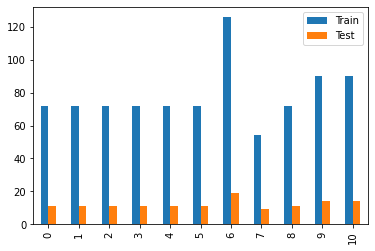

In [85]:
df=pd.concat([pd.DataFrame(np.unique(classes_train,return_counts=True)).drop(0).rename(index={1:'Train'}).T,
              pd.DataFrame(np.unique(classes_valid,return_counts=True)).drop(0).rename(index={1:'Test'}).T],axis=1)
              
df.plot(kind='bar');

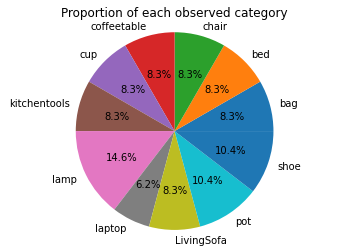

In [86]:
plt.pie(df['Train'],
        explode=(0, 0, 0, 0, 0, 0,0,0,0,0,0) , 
        labels=class_names,
        autopct='%1.1f%%')
plt.axis('equal')
plt.title('Proportion of each observed category')
plt.show()

In [87]:
def displayimagebyindex(index,dset='Train'):
    if dset=='Train':
        img=train_images[index]
        lbl=list(pd.Series(classes_train[index]).map(mapclass))[0]
    else:
        img=valid_images[index]
        lbl=list(pd.Series(classes_valid[index]).map(mapclass))[0]
    plt.figure()
    plt.imshow(img)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.title('{} Image #{} : {}'.format(dset,index,lbl))
    plt.show()

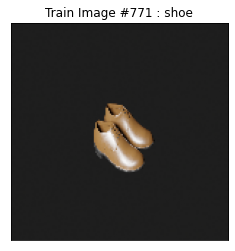

In [110]:
displayimagebyindex(np.random.randint(0,800),dset='Train')

In [111]:
model=tf.keras.models.Sequential()
model.add(tf.keras.layers.Conv2D(32, (3, 3), activation = 'relu', input_shape = (150, 150, 3)))
model.add(tf.keras.layers.MaxPooling2D(2,2))
model.add(tf.keras.layers.Conv2D(32, (3, 3), activation = 'relu'))
model.add(tf.keras.layers.MaxPooling2D(2,2))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(11, activation=tf.nn.softmax))

In [112]:
model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics=['accuracy'])

In [113]:
history = model.fit(train_images, classes_train, batch_size=128, epochs=100, validation_split = 0.2)

Epoch 1/100
6/6 [==============================] - 18s 3s/step - loss: 4.3145 - accuracy: 0.1346 - val_loss: 3.8311 - val_accuracy: 0.0000e+00
Epoch 2/100
6/6 [==============================] - 19s 3s/step - loss: 2.2233 - accuracy: 0.2315 - val_loss: 2.9959 - val_accuracy: 0.0000e+00
Epoch 3/100
6/6 [==============================] - 16s 3s/step - loss: 1.9615 - accuracy: 0.3401 - val_loss: 5.5598 - val_accuracy: 0.0173
Epoch 4/100
6/6 [==============================] - 16s 3s/step - loss: 1.6340 - accuracy: 0.4819 - val_loss: 7.2727 - val_accuracy: 0.0231
Epoch 5/100
6/6 [==============================] - 19s 3s/step - loss: 1.3438 - accuracy: 0.6064 - val_loss: 7.9550 - val_accuracy: 0.0116
Epoch 6/100
6/6 [==============================] - 16s 3s/step - loss: 1.0598 - accuracy: 0.6918 - val_loss: 8.9698 - val_accuracy: 0.0231
Epoch 7/100
6/6 [==============================] - 16s 3s/step - loss: 0.8201 - accuracy: 0.7786 - val_loss: 10.8868 - val_accuracy: 0.0289
Epoch 8/100
6/6 [=

In [114]:
print(classes_valid)

[ 0  0  0  0  0  0  0  0  0  0  0  2  1  1  2  2  2  1  2  1  1  1  2  2
  1  1  2  2  1  1  1  2  3  3  4  3  3  4  3  4  4  4  3  4  4  4  5  4
  4  4  3  2  3  3  3  3  5  6  6  6  6  5  6  6  5  6  5  6  6  6  6  5
  6  6  6  5  5  5  5  6  6  6  6  5  6  8  8  7  7  8  8  8  7  8  8  7
  9  8  9  8  8  9  7  8  9  7  7  9  7  7 10  9  9 10 10 10 10  9  9 10
  9 10  9 10 10  9 10  9 10  9 10 10 10]


In [115]:
print(len(valid_images))
print(len(classes_valid))

133
133


In [116]:
val_loss = model.evaluate(valid_images, classes_valid)

5/5 [==============================] - 1s 157ms/step - loss: 6.2646 - accuracy: 0.8271


In [117]:
predictions = model.predict(valid_images)
pred_labels = np.argmax(predictions, axis = 1)

In [118]:
def checkpredictions(index):
    displayimagebyindex(index,dset='Test')
    print('Predicted Class : ')
    print("     ",list(pd.Series(pred_labels[index]).map(mapclass))[0])

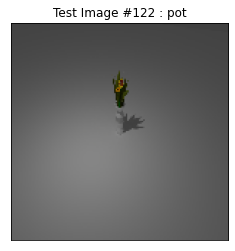

Predicted Class : 
      lamp


In [146]:
checkpredictions(np.random.randint(100,133))
#checkpredictions(122)

In [121]:
print(classification_report(classes_valid, pred_labels))

              precision    recall  f1-score   support

           0       0.73      1.00      0.85        11
           1       0.85      1.00      0.92        11
           2       0.79      1.00      0.88        11
           3       1.00      1.00      1.00        11
           4       1.00      1.00      1.00        11
           5       1.00      1.00      1.00        11
           6       0.66      1.00      0.79        19
           7       0.82      1.00      0.90         9
           8       0.92      1.00      0.96        11
           9       0.83      0.36      0.50        14
          10       0.00      0.00      0.00        14

    accuracy                           0.83       133
   macro avg       0.78      0.85      0.80       133
weighted avg       0.76      0.83      0.77       133



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
